# Explore here

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.arima.model import ARIMA

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

In [4]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv'

data = pd.read_csv(url, delimiter=',')

data.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [5]:
print(data['sales'].describe())

count     366.000000
mean      524.963968
std       275.089698
min        53.803211
25%       290.186822
50%       520.699468
75%       763.289263
max      1000.482785
Name: sales, dtype: float64


In [6]:
data2 = data.copy()
data2['MA_5'] = data['sales'].rolling(5).mean()
data2['MA_10'] = data['sales'].rolling(10).mean()

<Axes: xlabel='date', ylabel='sales'>

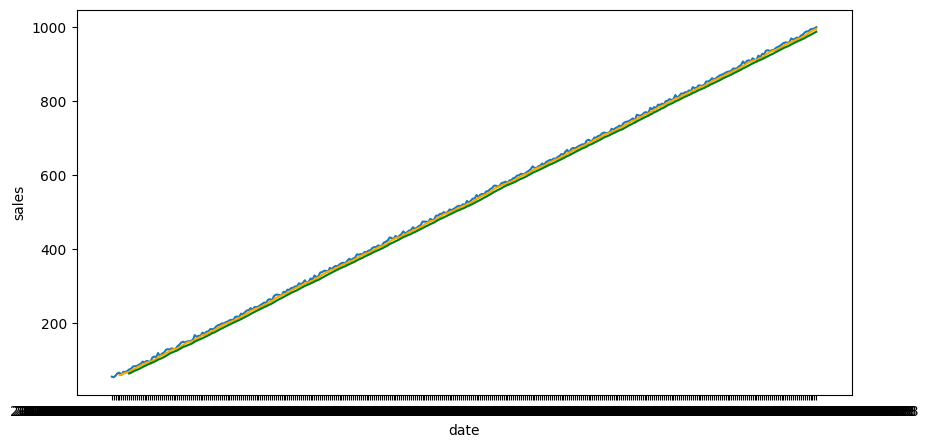

In [7]:
plt.figure(figsize=(10,5))
sns.lineplot(x = data2['date'], y = data2['sales'])
sns.lineplot(x = data2['date'], y = data2['MA_5'], color = 'orange')
sns.lineplot(x = data2['date'], y = data2['MA_10'], color = 'green')

In [8]:
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')
data.sort_index(inplace=True)
data.head()

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633


In [9]:
cantidad_nan = data.isna().sum()
print("Cantidad de NaN:")
print(cantidad_nan)

Cantidad de NaN:
sales    0
dtype: int64


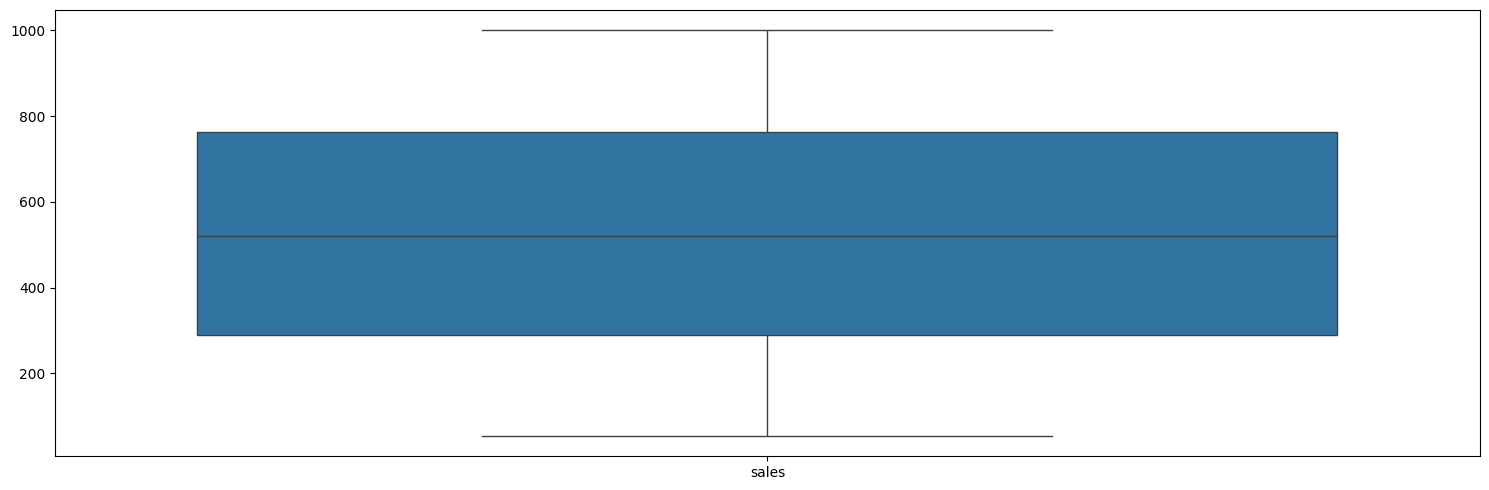

In [10]:
fig, axis = plt.subplots(figsize=(15, 5))
sns.boxplot(data=data)
plt.tight_layout()
plt.show()

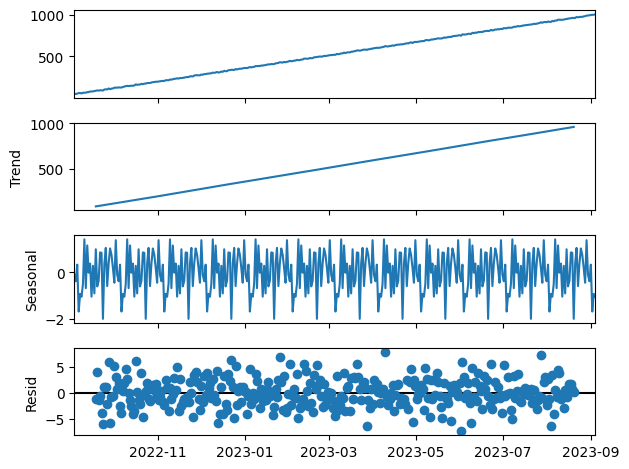

In [11]:
sd = seasonal_decompose(data, model='additive', period=30)
sd.plot()
plt.tight_layout()
plt.show()


In [12]:
def verificar_estacionariedad(t):
    resultado = adfuller(t, autolag='AIC')
    
    estadistico = resultado[0]
    p_valor = resultado[1]
    lags = resultado[2]
    n_obs = resultado[3]

    print(f'Estadístico de prueba: {estadistico:.4f}')
    print(f'p-valor: {p_valor:.4f}')
    print(f'Rezagos usados: {lags}')
    print(f'Nº observaciones: {n_obs}')
    
    if p_valor < 0.05:
        print("est")
    else:
        print("no est")

print("Prueba de Estacionariedad")
verificar_estacionariedad(data['sales'])

Prueba de Estacionariedad
Estadístico de prueba: 0.5454
p-valor: 0.9862
Rezagos usados: 13
Nº observaciones: 352
no est


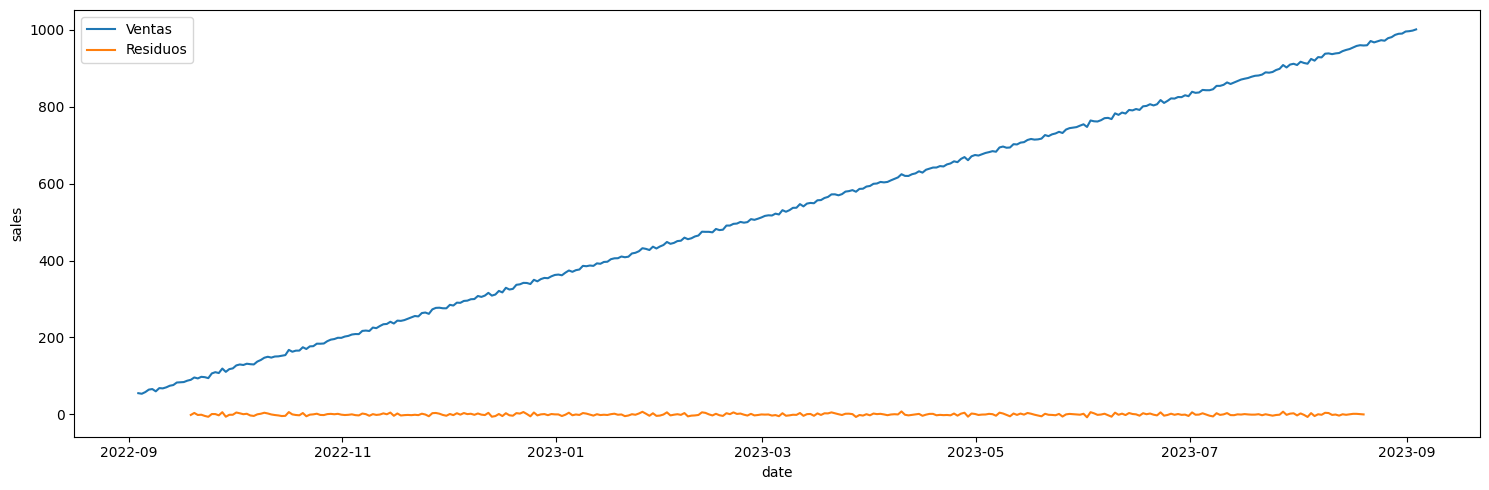

In [13]:
descomp = sd.resid
fig, axis = plt.subplots(figsize = (15, 5))

sns.lineplot(x=data.index, y=data['sales'], label='Ventas')
sns.lineplot(x=descomp.index, y=descomp, label='Residuos')

plt.tight_layout()
plt.show()

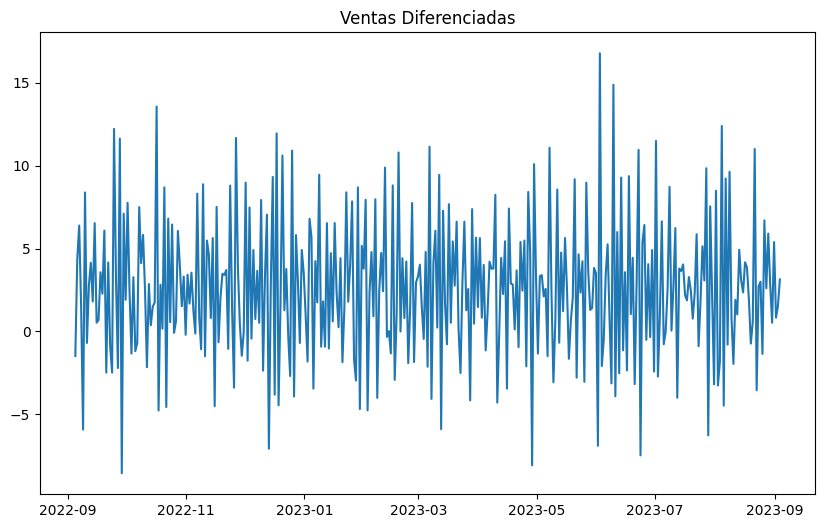

In [14]:
data['diff_sales'] = data['sales'].diff()
data.dropna(inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(data['diff_sales'])
plt.title('Ventas Diferenciadas')
plt.show()

In [15]:
verificar_estacionariedad(data["diff_sales"].dropna())

Estadístico de prueba: -9.4303
p-valor: 0.0000
Rezagos usados: 12
Nº observaciones: 352
est


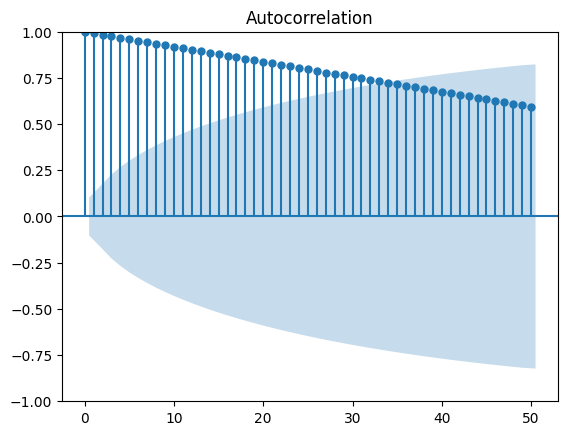

In [16]:
plot_acf(data['sales'],lags = 50)
plt.show()

In [ ]:
'''import warnings

warnings.filterwarnings("ignore")

p_values = range(0, 5)
d_values = range(0, 2) 
q_values = range(0, 5)

mejor_aic = float('inf')
mejor_orden = None
mejor_modelo = None

for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                modelo = ARIMA(train, order=(p, d, q)).fit()
                if modelo.aic < mejor_aic:
                    mejor_aic = modelo.aic
                    mejor_orden = (p, d, q)
                    mejor_modelo = modelo
            except:
                continue

print(f"Mejor orden ARIMA: {mejor_orden} con AIC = {mejor_aic:.2f}")'''


Mejor orden ARIMA: (1, 1, 3) con AIC = 1492.05


In [18]:
train, test = train_test_split(data['sales'], test_size=0.2, shuffle=False)
model = ARIMA(train, order=(1, 1, 3)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                  292
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -741.024
Date:                Fri, 04 Jul 2025   AIC                           1492.048
Time:                        09:35:41   BIC                           1510.415
Sample:                    09-04-2022   HQIC                          1499.406
                         - 06-22-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   2.25e-06   4.44e+05      0.000       1.000       1.000
ma.L1         -2.0153      0.070    -28.963      0.000      -2.152      -1.879
ma.L2          1.1076      0.119      9.334      0.000       0.875       1.340
ma.L3         -0.0919      0.056     -1.642      0.101      -0.202       0.018
sigma2         9.1431      0.871     10.502      0.000       7.437      10.850
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.94
Prob(Q):                              0.91   Prob(JB):                         0.38
Heteroskedasticity (H):               1.00   Skew:                             0.05
Prob(H) (two-sided):                  0.99   Kurtosis:                         2.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
data.drop(columns=['diff_sales'], inplace=True)

In [20]:
forecast = model.predict(start=len(train), end=len(train)+len(test)-1)

rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

RMSE: 2.99
MAE: 2.45


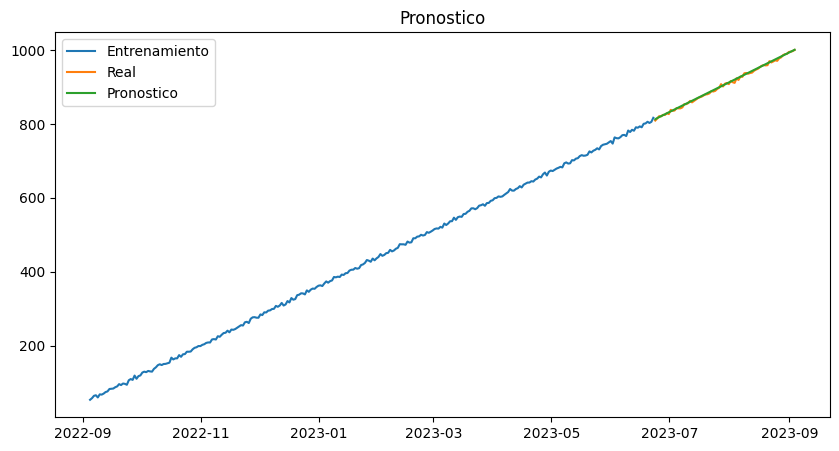

In [21]:
plt.figure(figsize=(10,5))
plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Real')
plt.plot(test.index, forecast, label='Pronostico')
plt.legend()
plt.title("Pronostico")
plt.show()

In [23]:
from pickle import dump
with open('modelo.pkl', 'wb') as file:
    dump(model, file)